# Clustering Data Burger Star using K-Means Algorithm

## Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

## Uploading CSV File

In [3]:
data = pd.read_csv("Static Dataset Transaction - Burger Star (Outlet A) .csv")

In [4]:
data.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


## Take 'Amount Burger' and 'Amount Drink' for Clustering

In [5]:
y = ["Amount Burger", "Amount Drink"]
y = data[y]
y.head()

,Amount Burger,Amount Drink
0,6,3
1,12,10
2,10,5
3,9,9
4,11,3


## Count Optimal Value of Cluster using Silhouette

In [6]:
range_n_clusters = [2, 3, 4]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(y)
    labels = kmeans.predict(y)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(y, labels)
    print(silhouette_avg)

0.501806717699717
0.5364180462492156
0.5329996827159573


## Clustering Process using K-Means

In [17]:
kmeans = KMeans(n_clusters = 3, max_iter =1000)
kmeans.fit(y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Clustering Result

In [18]:
labels = kmeans.predict(y)
centroids = kmeans.cluster_centers_

In [19]:
print(labels)

[0 2 1 2 1 1 2 0 0 2 1 2 1 2 1 2 0 0 0 0 2 0 0 0 0 1 2 1 2 0 1 2 1 2 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 0 0 1 2 1 2 1 1 2 1 1 1 1 2 1 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 0 0 1 2
 0 0 1 2 1 2 1 1 2 1 0 0 1 2 1 2 1 1 2 1 1 1 1 2 1 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 0 0 1 2 1 2 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 0 0 1 2 1 2 1 1 2 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 0 0 1 2 1 2 0 0 0
 0 2 0 0 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 0 0
 1 2 1 2 1 1 2 1 1 1 1 2 1 2 0 0]


In [20]:
print(centroids)

[[3.38271605 2.72222222]
 [9.29069767 2.45348837]
 [9.421875   8.890625  ]]


Text(0,0.5,'Amount Drink')

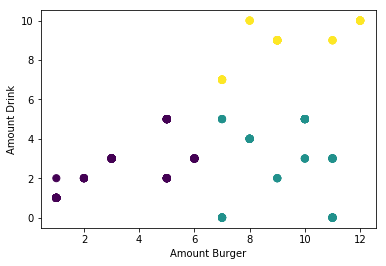

In [21]:
plt.scatter(y["Amount Burger"], y["Amount Drink"], c=labels, s=50, cmap='viridis')
plt.xlabel("Amount Burger")
plt.ylabel("Amount Drink")

## Make New Column Contain of the Cluster Result

In [22]:
labels = pd.DataFrame(labels)

In [23]:
labels.head()

,0
0,0
1,2
2,1
3,2
4,1


In [24]:
data["Klaster"] = labels

In [25]:
data.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,Klaster
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,0
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,2
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,1
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,2
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,1


In [26]:
data["Pembelian"] = np.where(data["Klaster"]==0, "Sedikit",np.where(data["Klaster"]==1, "Sedang", "Banyak"))
data.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,Klaster,Pembelian
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,0,Sedikit
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,2,Banyak
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,1,Sedang
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,2,Banyak
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,1,Sedang


## Make Some Visualization based on Clustering Result

### Cluster 0 (Cluster With a Small Number of Purchasing)

Text(0.5,1,'Jumlah Penggunaan Metode Pembayaran')

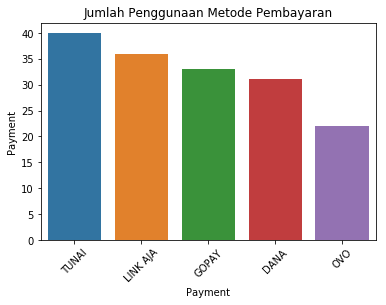

In [27]:
klaster_0 = data[data.Klaster == 0]
payment_0 = klaster_0.groupby("Payment")
hitung = payment_0["Payment"].count().sort_values(ascending = False)

sns.barplot(x = hitung.index, y = hitung)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Jumlah Penggunaan Metode Pembayaran")

Text(0.5,1,'Jumlah Pembelian Minuman')

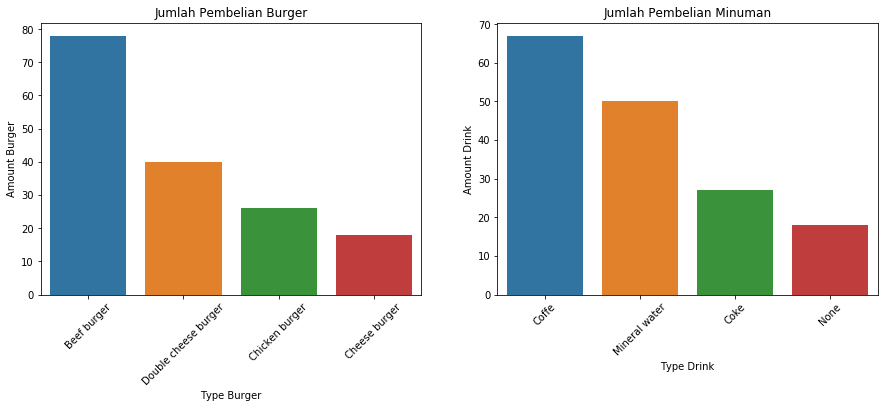

In [40]:
f = plt.figure(figsize = (15,5))

klaster_0 = data[data.Klaster == 0]
burger_0 = klaster_0.groupby("Type Burger")
hitung = burger_0["Amount Burger"].count().sort_values(ascending = False)

f.add_subplot(1, 2, 1)
sns.barplot(x = hitung.index, y = hitung)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Jumlah Pembelian Burger")

klaster_0 = data[data.Klaster == 0]
drink_0 = klaster_0.groupby("Type Drink")
hitung = drink_0["Amount Drink"].count().sort_values(ascending = False)

f.add_subplot(1, 2, 2)
sns.barplot(x = hitung.index, y = hitung)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Jumlah Pembelian Minuman")

Text(0.5,1,'Jumlah Pembelian Minuman')

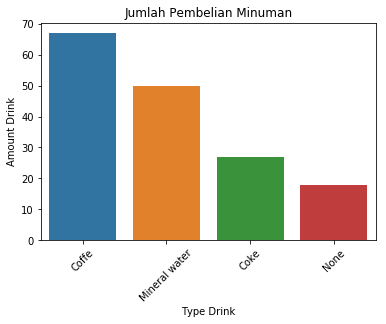

### Cluster 1 (Cluster With a Moderate Number of Purchasing)

Text(0.5,1,'Jumlah Penggunaan Metode Pembayaran')

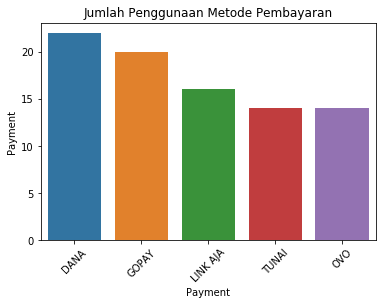

In [40]:
klaster_1 = data[data.Klaster == 1]
payment_1 = klaster_1.groupby("Payment")
hitung = payment_1["Payment"].count().sort_values(ascending = False)

sns.barplot(x = hitung.index, y = hitung)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Jumlah Penggunaan Metode Pembayaran")

Text(0.5,1,'Jumlah Pembelian Minuman')

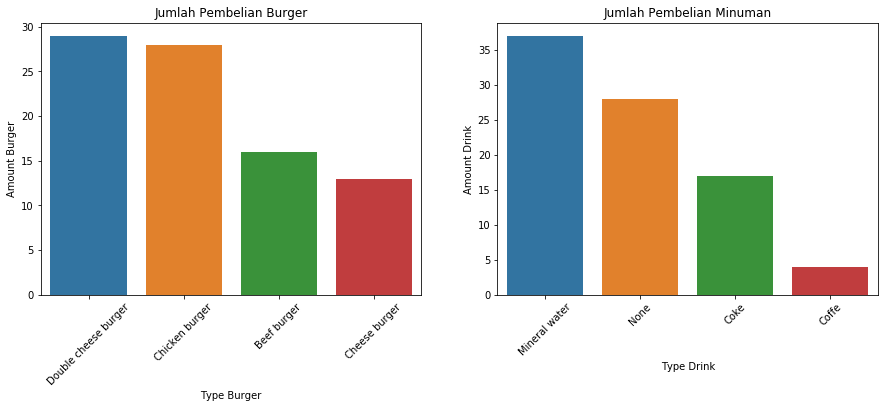

In [41]:
f = plt.figure(figsize = (15,5))
klaster_1 = data[data.Klaster == 1]
burger_1 = klaster_1.groupby("Type Burger")
hitung = burger_1["Amount Burger"].count().sort_values(ascending = False)

f.add_subplot(1, 2, 1)
sns.barplot(x = hitung.index, y = hitung)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Jumlah Pembelian Burger")

klaster_1 = data[data.Klaster == 1]
drink_1 = klaster_1.groupby("Type Drink")
hitung = drink_1["Amount Drink"].count().sort_values(ascending = False)

f.add_subplot(1, 2, 2)
sns.barplot(x = hitung.index, y = hitung)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Jumlah Pembelian Minuman")

### Cluster 2 (Cluster With a Large Number of Purchasing)

Text(0.5,1,'Jumlah Penggunaan Metode Pembayaran')

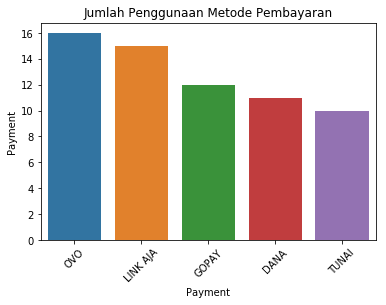

In [43]:
klaster_2 = data[data.Klaster == 2]
payment_2 = klaster_2.groupby("Payment")
hitung = payment_2["Payment"].count().sort_values(ascending = False)

sns.barplot(x = hitung.index, y = hitung)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Jumlah Penggunaan Metode Pembayaran")

Text(0.5,1,'Jumlah Pembelian Minuman')

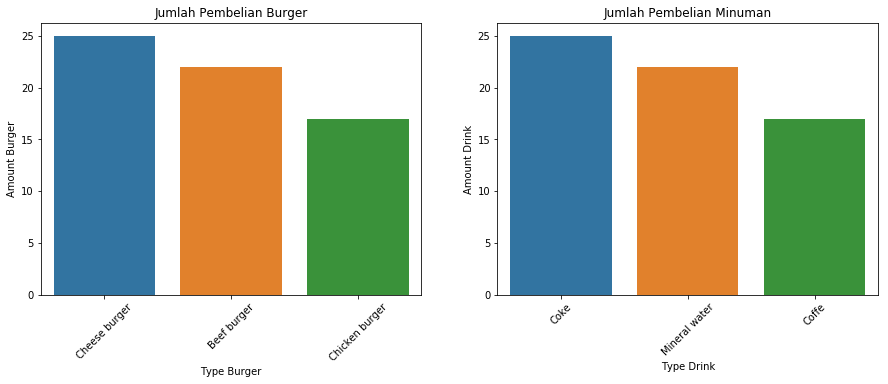

In [42]:
f = plt.figure(figsize = (15,5))
klaster_2 = data[data.Klaster == 2]
burger_2 = klaster_2.groupby("Type Burger")
hitung = burger_2["Amount Burger"].count().sort_values(ascending = False)

f.add_subplot(1, 2, 1)
sns.barplot(x = hitung.index, y = hitung)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Jumlah Pembelian Burger")

klaster_2 = data[data.Klaster == 2]
drink_2 = klaster_2.groupby("Type Drink")
hitung = drink_2["Amount Drink"].count().sort_values(ascending = False)

f.add_subplot(1, 2, 2)
sns.barplot(x = hitung.index, y = hitung)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Jumlah Pembelian Minuman")